In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#df = pd.read_csv('data/winequality-red.csv')
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64


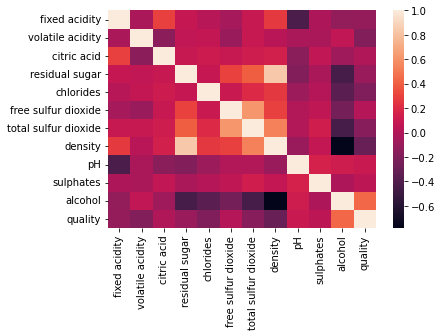

In [5]:
sns.heatmap(df.corr())
plt.show()

In [6]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [7]:
# taking features with correlation more than 0.05 as input x and quality as target variable y 
features = get_features(0.05) 
print(features) 
X = df[features] 
y = df['quality']

['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=99)

Simple Linear Regression Approach

In [9]:
# Fit linear regression to training data
lr = LinearRegression()
lr.fit(X_train,y_train)

# Predict
train_pred=lr.predict(X_train)
lr_pred = lr.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))

Mean Absolute Error: 0.590628665780757
Mean Squared Error: 0.5670255304889152


In [10]:
# displaying coefficients of each feature
coeffecients = pd.DataFrame(lr.coef_,features)
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

                      Coeffecient
fixed acidity            0.054928
volatile acidity        -1.995335
residual sugar           0.081945
chlorides               -0.254457
total sulfur dioxide     0.000887
density               -144.604692
pH                       0.728172
sulphates                0.623852
alcohol                  0.206197


Ridge Regression Approach

We'll generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [11]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [12]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.01155064850041579

In [13]:
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, ridge_pred))
print('Mean Squared Error:', mean_squared_error(y_test, ridge_pred))

Mean Absolute Error: 0.5910781341788466
Mean Squared Error: 0.569001760748422


In [14]:
# displaying coefficients of each feature
coeffecients = pd.DataFrame(ridge.coef_,features)
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

                      Coeffecient
fixed acidity            0.020744
volatile acidity        -1.990565
residual sugar           0.065425
chlorides               -0.571577
total sulfur dioxide     0.000792
density               -104.323705
pH                       0.571489
sulphates                0.558996
alcohol                  0.244712


LASSO Regression Approach

In [15]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize = True)
lassocv.fit(X_train, y_train)
lassocv.alpha_

9.666422990186185e-05

In [16]:
lasso = Lasso(alpha = lassocv.alpha_, normalize = True)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, lasso_pred))
print('Mean Squared Error:', mean_squared_error(y_test, lasso_pred))

Mean Absolute Error: 0.5915789660472502
Mean Squared Error: 0.5701155666957567


In [17]:
# displaying coefficients of each feature
coeffecients = pd.DataFrame(lasso.coef_,features)
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

                      Coeffecient
fixed acidity           -0.000000
volatile acidity        -1.968150
residual sugar           0.055130
chlorides               -0.478281
total sulfur dioxide     0.000565
density                -78.109833
pH                       0.455537
sulphates                0.487951
alcohol                  0.270045
